# Housing Prices: Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('data/train.csv', index_col='Id')
test = pd.read_csv('data/test.csv', index_col='Id')

# Separate out the target values
target = train.SalePrice
train  = train.drop('SalePrice', axis=True)

***
## View the target data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


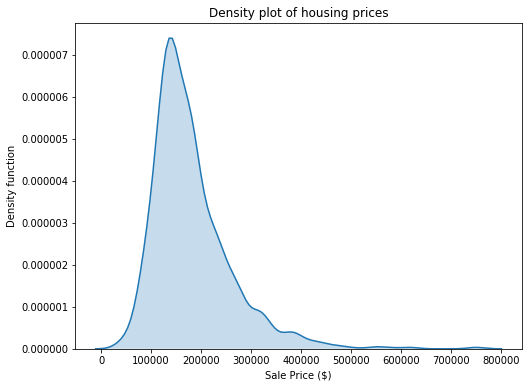

In [4]:
plt.figure(figsize=(8,6))
sns.kdeplot(target, shade=True, legend=False)
plt.title('Density plot of housing prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Density function')
plt.show()

***
## View the training data at a glance

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### View all of the columns in the first row

In [6]:
print(train.iloc[0,:40],'\n')
print(train.iloc[0,40:])

MSSubClass           60
MSZoning             RL
LotFrontage          65
LotArea            8450
Street             Pave
Alley               NaN
LotShape            Reg
LandContour         Lvl
Utilities        AllPub
LotConfig        Inside
LandSlope           Gtl
Neighborhood    CollgCr
Condition1         Norm
Condition2         Norm
BldgType           1Fam
HouseStyle       2Story
OverallQual           7
OverallCond           5
YearBuilt          2003
YearRemodAdd       2003
RoofStyle         Gable
RoofMatl        CompShg
Exterior1st     VinylSd
Exterior2nd     VinylSd
MasVnrType      BrkFace
MasVnrArea          196
ExterQual            Gd
ExterCond            TA
Foundation        PConc
BsmtQual             Gd
BsmtCond             TA
BsmtExposure         No
BsmtFinType1        GLQ
BsmtFinSF1          706
BsmtFinType2        Unf
BsmtFinSF2            0
BsmtUnfSF           150
TotalBsmtSF         856
Heating            GasA
HeatingQC            Ex
Name: 1, dtype: object 

CentralAir     

Many of these object columns are ordinal. Take 'FireplaceQu' for example.

In [7]:
train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

The description of the values are as follows:
- Ex – Excellent - Exceptional Masonry Fireplace
- Gd – Good - Masonry Fireplace in main level
- TA – Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa – Fair - Prefabricated Fireplace in basement
- Po – Poor - Ben Franklin Stove
- NA – No Fireplace

Thus, these columns can be converted into integer format.

***
## Number of columns with null values

In [8]:
def count_null_columns(dataframe):
    dtypes = ['object', 'int64', 'float64']
    count = [0,0,0]
    
    for column in dataframe.columns:
        dtype = dataframe[column].dtype
        null_present = dataframe[column].isnull().values.any()
        
        if null_present & (dtype == 'object'):
            count[0] = count[0] + 1
        if null_present & (dtype == 'int64'):
            count[1] = count[1] + 1
        if null_present & (dtype == 'float64'):
            count[2] = count[2] + 1
    
    return count

# Count null columns
train_count_null_columns = count_null_columns(train)
test_count_null_columns = count_null_columns(test)

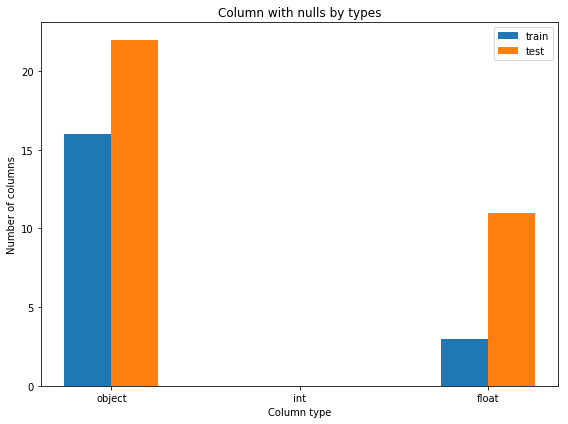

In [9]:
# create plot
n_groups = 3
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
plt.bar(index, train_count_null_columns, bar_width, label='train')
plt.bar(index + bar_width, test_count_null_columns, bar_width, label='test')

plt.xlabel('Column type')
plt.ylabel('Number of columns')
plt.title('Column with nulls by types')
plt.xticks(index + .5*bar_width, ('object', 'int', 'float'))
plt.legend()
 
plt.tight_layout()
plt.show()

### Float columns with nulls

In [10]:
train_float_null_columns = list(train.select_dtypes(include='float').loc[:,train.isnull().any()].columns)
test_float_null_columns = list(test.select_dtypes(include='float').loc[:,test.isnull().any()].columns)

In [11]:
def null_count(dataframe, column_list):
    null_count_list = []
    for column in column_list:
        count = dataframe[column].isnull().values.sum()
        null_count_list.append(count)
    
    return null_count_list

train_nulls = null_count(train,test_float_null_columns)
test_nulls = null_count(test,test_float_null_columns)

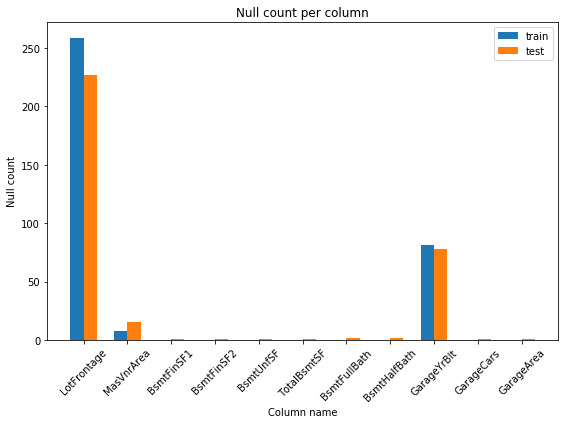

In [12]:
# create plot
n_groups = len(test_float_null_columns)
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, train_nulls, bar_width, label='train')
rects2 = plt.bar(index + bar_width, test_nulls, bar_width, label='test')

plt.xlabel('Column name')
plt.ylabel('Null count')
plt.title('Null count per column')
plt.xticks(rotation=45)
plt.xticks(index + .5*bar_width, test_float_null_columns)
plt.legend()
 
plt.tight_layout()
plt.show()

The columns 'LotFrontage' and 'GarageYrBlt' have the highest null counts. The nulls in 'LotFrontage' may simply mean the the lot frontage was 0.

### Examine the object columns with null values
There are too many to plot, so I'll just list them

In [13]:
test_object_null_column = test.select_dtypes(include='object').isnull().sum()

In [14]:
test_object_null_column[test_object_null_column > 0]

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Object columns that are not ordinal will have the null values filled with the text string 'no_entry'. This will allow us get dummy varibles and still retain the fact that there is missing information.

***
## Check for outliers
I will plot the features separated into large scale, medium scale, and small scale.

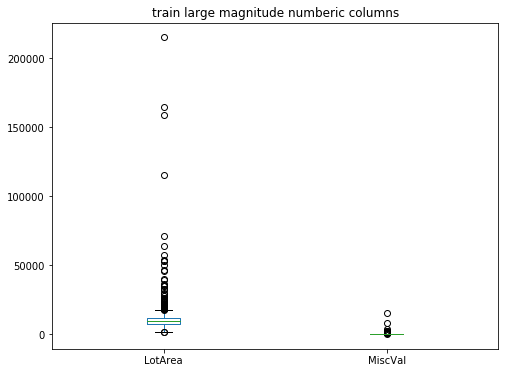

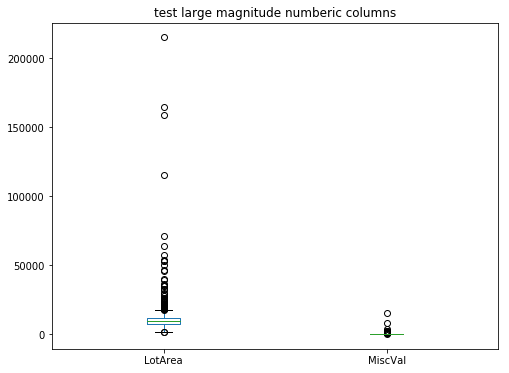

In [15]:
# Isolate the numeric data
train_num = train.select_dtypes(exclude=['object'])
test_num = test.select_dtypes(exclude=['object'])

train_num_large = train_num.loc[:,abs(train_num.max()) >= 10000]
test_num_large = test_num.loc[:,abs(test_num.max()) >= 10000]

# Create a box plot to look for outliers
train_num_large.plot.box(figsize=(8,6), title='train large magnitude numberic columns')
plt.show()
train_num_large.plot.box(figsize=(8,6), title='test large magnitude numberic columns')
plt.show()

### Medium magnitude columns

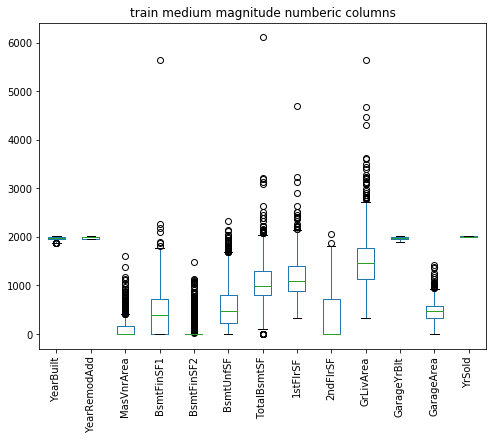

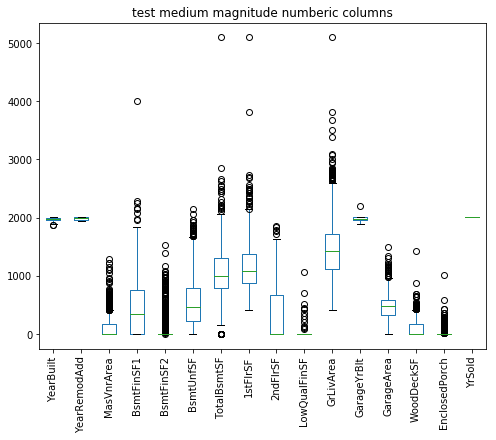

In [16]:
train_num_medum = train_num.loc[:,(abs(train_num.max()) < 10000) & (abs(train_num.max()) >= 1000)]
test_num_medum = test_num.loc[:,(abs(test_num.max()) < 10000) & (abs(test_num.max()) >= 1000)]

# Create a box plot to look for outliers
train_num_medum.plot.box(figsize=(8,6), title='train medium magnitude numberic columns',rot=90)
plt.show()
test_num_medum.plot.box(figsize=(8,6), title='test medium magnitude numberic columns',rot=90)
plt.show()

It looks like there is an outlier in the year the garage was built in the test set.

In [17]:
test.GarageYrBlt.max()

2207.0

Yes, the garage was not built in 2207. Let's examine all the columns with year values.

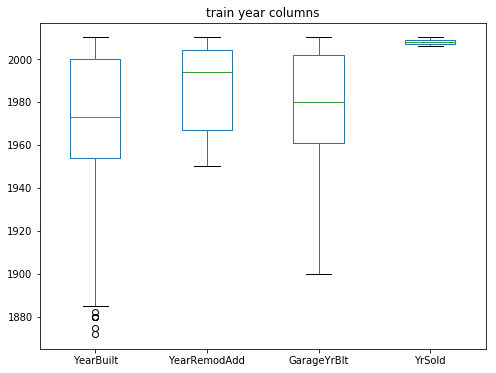

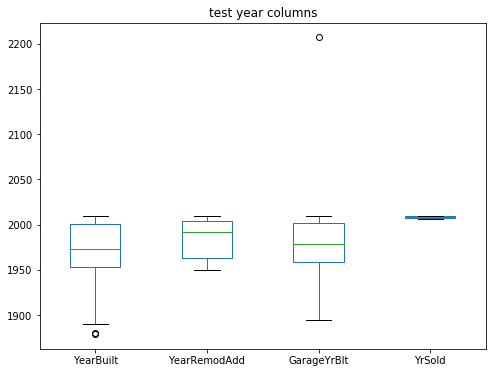

In [18]:
year_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

train_num[year_columns].plot.box(figsize=(8,6), title='train year columns',rot=0)
plt.show()
test_num[year_columns].plot.box(figsize=(8,6), title='test year columns',rot=0)
plt.show()

There is the outlier in the test set. That value will have to be addressed.
### Small magnitude columns

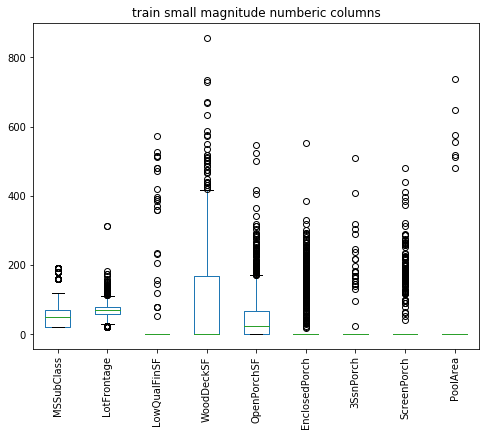

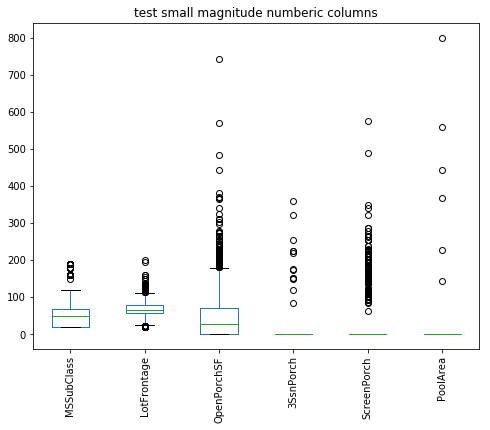

In [19]:
train_num_small = train_num.loc[:,(abs(train_num.max()) < 1000) & (abs(train_num.max()) >= 20)]
test_num_small = test_num.loc[:,(abs(test_num.max()) < 1000) & (abs(test_num.max()) >= 20)]

# Create a box plot to look for outliers
train_num_small.plot.box(figsize=(8,6), title='train small magnitude numberic columns',rot=90)
plt.show()
test_num_small.plot.box(figsize=(8,6), title='test small magnitude numberic columns',rot=90)
plt.show()

The last three columns have a large skew however the values seem reasonable, and the low values are likely dominated by values of 0.
### Very small magnitude columns

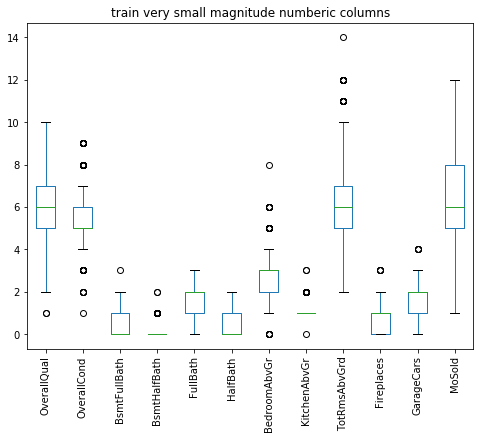

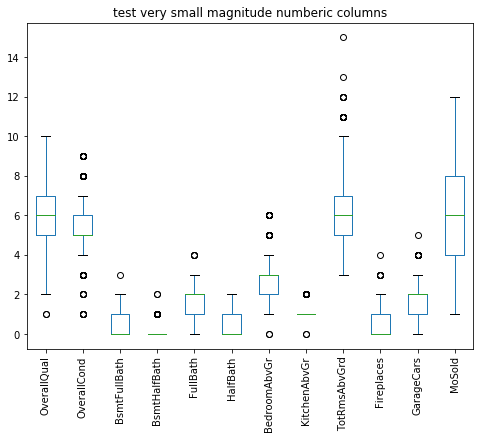

In [20]:
train_num_vsmall = train_num.loc[:,(abs(train_num.max()) < 20)]
test_num_vsmall = test_num.loc[:,(abs(test_num.max()) < 20)]

# Create a box plot to look for outliers
train_num_vsmall.plot.box(figsize=(8,6), title='train very small magnitude numberic columns',rot=90)
plt.show()
test_num_vsmall.plot.box(figsize=(8,6), title='test very small magnitude numberic columns',rot=90)
plt.show()

***
# Summary of the data processing to be done
- Convert ordinal object columns to integers.
- The 'MSSubClass' column is an integer column, but it list categorical information. The integers are codes categorizing dwelling types.
- The null values must be filled, and the method will be at a per column basis.
- The outlier in the test set must be addressed.